### Homework
    modify the code below by replacinf the fitness function.
    You can choose one of two fitness functions, please indicate which one you work on
    Option a:
    Instead of doing NK, the sum of the numbers in the genome define fitness
    This is rather easy, so once that is done, explore how large genomes (N~20, ~40, ~100)
    perform in this environment
    Option b:
    Make the checkerboard fitness function. There you count how many numbers in the genome
    sequence are identical. If the number flips you get rewarded if the next sequence of numbers
    is as long as the first. Example:
    Genome: 1100110011
    Length   2 2 2 2 2
    Fitness 10
    
    Genome: 1010110110
    Length  1 1 1 1 2 1 2 1
    Fitness 4 (the first four ones are summed then the sequence has none matching lengths)
    
    It becomes interesting to see what the diversity of solutions looks like

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from pandas import *
import random

In [16]:
def makeNKTable(N,K):
    NKTable=list()
    for n in range(N):
        L=list()
        for i in range(2**K):
            L.append(round(random.uniform(0.0,1.0),2))
        NKTable.append(L)
    return NKTable

print makeNKTable(5,2)


[[0.8, 0.45, 0.53, 0.44], [0.38, 0.12, 0.79, 0.05], [0.21, 0.4, 0.64, 0.97], [0.29, 0.45, 0.9, 0.94], [0.82, 0.61, 0.45, 0.8]]


In [17]:
def makePopulation(N,popSize):
    population=list()
    for p in range(popSize):
        genome=list()
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)

[[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 1, 1], [0, 1, 0, 0, 1], [0, 0, 1, 0, 1], [0, 0, 1, 0, 1]]


## Option A

Compute fitness

In [21]:
def computeFitness(genome):
    return sum(genome)

## Option B
COmpute Fitness

In [ ]:
def computeFitness_original(genome,NKTable,N,K):
    fitness=1.0
    for n in range(N):
        c=1
        s=0
        for k in range(K):
            #print n, k, s, c
            #print "__"
            s = s + genome[(n + k) % N] * c
            c=c*2
        #s is the row index
        #n is the column index
        fitness = fitness * NKTable[n][s]
    return pow(fitness, 1.0 / float(N))

In [22]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

for i in range(10):
    print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]


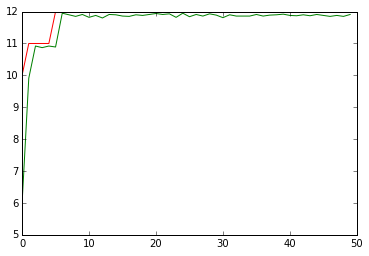

In [14]:
random.seed(0)

#create a population
N=12
K=5
popSize=100
population=makePopulation(N,popSize)
currentNKTable=makeNKTable(N,K)
generations=50
mutationRate=0.01

meanW=list()
maxW=list()
    
for generation in range(generations):
    W=list()
    for i in range(len(population)):
        W.append(computeFitness(population[i]))  
    nextGeneration=list()
    meanW.append(mean(W))
    highestFitness=max(W)
    maxW.append(highestFitness)
    
    while len(nextGeneration)<popSize:
        who=random.randint(0,popSize-1)
        while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
            who=random.randint(0,popSize-1)
        nextGeneration.append(makeMutant(population[who],mutationRate))
    population=list(nextGeneration)

plot(meanW,'g')
plot(maxW,'r')

In [20]:
def computeFitness_original(genome,NKTable,N,K):
    fitness=1.0
    for n in range(N):
        c=1
        s=0
        for k in range(K):
            #print n, k, s, c
            #print "__"
            s = s + genome[(n + k) % N] * c
            c=c*2
        #s is the row index
        #n is the column index
        fitness = fitness * NKTable[n][s]
    return pow(fitness, 1.0 / float(N))

random.seed(0)
N=4
K=3
print computeFitness_original([0,0,1,0],makeNKTable(N,K),N,K)

0.679960798946
